# Images-based Drug Search Engine using PaddleOCR and Levenstein Algorithm Spelling Correction
> *Dataquest Final*
> *Author: Three Outliers: Eduardus Tjitrahardja, Ikhlasul Akmal Hanif, and Rahmat Bryan Naufal*

In [ ]:
# untuk dirun di collab, (namun untuk notebook ini aslinya dirun di local dengan requirements.txt yang tersedia)
!pip install "paddleocr>=2.0.1"
!pip install paddlepaddle-gpu
!pip install paddleocr
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!git clone https://github.com/PaddlePaddle/PaddleOCR

## Load Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm
from PIL import Image
from IPython.display import display

from jiwer import wer, mer, cer

## Helpers

In [131]:
def plot_ocr(ocr, img_path):
    result = ocr.ocr(img_path, cls=True)

    result = result[0]
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    if result is not None:
        txts = [line[1][0] for line in result]
        scores = [line[1][1] for line in result]
        im_show = draw_ocr(image, boxes, txts, scores, font_path='./PaddleOCR/doc/fonts/simfang.ttf')
        im_show = Image.fromarray(im_show)
        display(im_show)


def evaluate_ocr(df, label_col, pred_col='predicted'):
    accuracy = (df[label_col] == df[pred_col]).mean()
    print('Accuracy: {:.2f}%'.format(accuracy * 100))
    print("WER: ", wer(df[label_col].tolist(), df[pred_col].tolist()))
    print("MER: ", mer(df[label_col].tolist(), df[pred_col].tolist()))
    print("CER: ", cer(df[label_col].tolist(), df[pred_col].tolist()))

## Load Data

In [132]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

train_df.head()

,Image Name,Folder Name
0,image_1.jpg,Abacavir
1,image_10.jpeg,Abacavir
2,image_11.jpg,Abacavir
3,image_12.jpg,Abacavir
4,image_13.jpg,Abacavir


In [133]:
train_df['Folder Name'].value_counts()

Betadine             90
Canesten             90
Calcium D Redoxon    90
Buscopan             90
Bisolvon             90
                     ..
Racecadotril         20
Riboflavin           18
Terbutaline          14
Quixx                14
Paxlovid             12
Name: Folder Name, Length: 160, dtype: int64

In [134]:
train_df["Folder Name"].nunique()

160

In [137]:
file_ext = set()
for file_name in os.listdir('./dataset/Train_final'):
    # if file_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))
    ext = file_name.split('.')[-1]
    file_ext.add(ext)
print(file_ext)

{'JPG', 'PNG', 'png', 'jpeg', 'bmp', 'jpg', 'webp', 'gif'}


## OCR

In [45]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2023/10/08 12:11:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\edutj/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\edutj/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_leng

[2023/10/08 11:16:19] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.2620260715484619
[2023/10/08 11:16:19] ppocr DEBUG: cls num  : 13, elapsed : 0.04451179504394531
[2023/10/08 11:16:19] ppocr DEBUG: rec_res num  : 13, elapsed : 0.14351797103881836


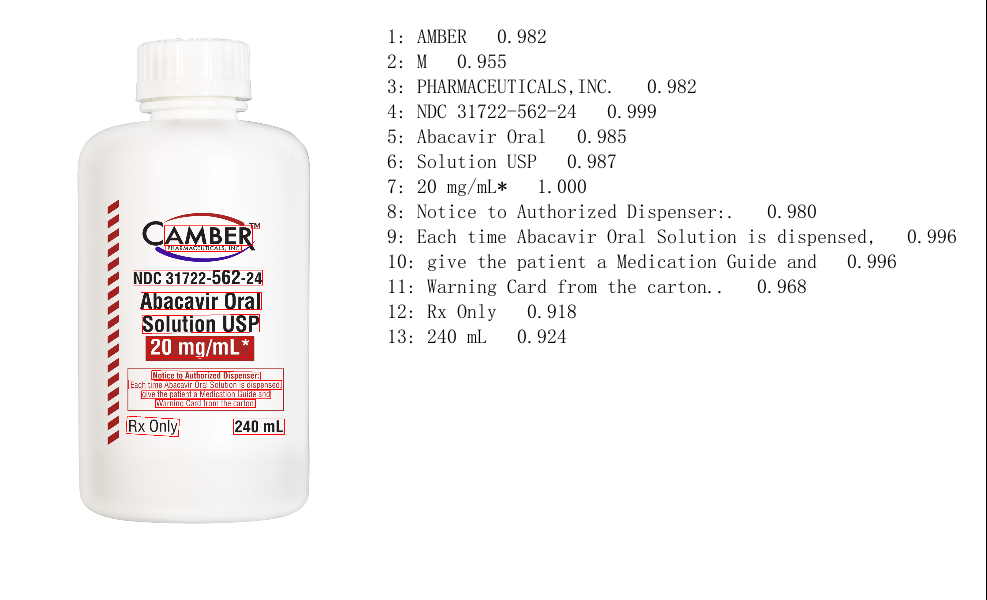

In [41]:
plot_ocr(ocr, './dataset/Train_final/image_1.jpg')

In [46]:

# Specify the folder containing the images
folder_path = './dataset/Test_final'

# List all files in the folder
files = os.listdir(folder_path)

sentences = []
image_dirs = []
# draw result
for file_name in files:
    if file_name.endswith(tuple(file_ext)):  # Check for image file extensions
        img_path = os.path.join(folder_path, file_name)
        result = ocr.ocr(img_path, cls=True)
        print(img_path)

        # Draw result
        result = result[0]
        if result is not None:
            txts = [line[1][0] for line in result]
            sentences.append(txts)
            image_dirs.append(img_path)
        else:
            sentences.append([])
            image_dirs.append(img_path)

[2023/10/08 12:11:26] ppocr DEBUG: dt_boxes num : 17, elapsed : 2.6449053287506104
[2023/10/08 12:11:29] ppocr DEBUG: cls num  : 17, elapsed : 2.6107444763183594
[2023/10/08 12:11:29] ppocr DEBUG: rec_res num  : 17, elapsed : 0.3114643096923828
./dataset/Test_final\image_10000.jpg
[2023/10/08 12:11:29] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.09951353073120117
[2023/10/08 12:11:29] ppocr DEBUG: cls num  : 8, elapsed : 0.04299211502075195
[2023/10/08 12:11:29] ppocr DEBUG: rec_res num  : 8, elapsed : 0.11617040634155273
./dataset/Test_final\image_10001.jpg
[2023/10/08 12:11:29] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.10852813720703125
[2023/10/08 12:11:29] ppocr DEBUG: cls num  : 10, elapsed : 0.03999924659729004
[2023/10/08 12:11:30] ppocr DEBUG: rec_res num  : 10, elapsed : 0.13252592086791992
./dataset/Test_final\image_10002.jpg
[2023/10/08 12:11:30] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.09516119956970215
[2023/10/08 12:11:30] ppocr DEBUG: cls num  : 34, elapsed : 0.10003

In [47]:
# save list to local
import pickle

with open('./dataset/test_sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)
with open('./dataset/test_image_dirs.pkl', 'wb') as f:
    pickle.dump(image_dirs, f)

In [48]:
# load list from local
import pickle

with open('./dataset/test_sentences.pkl', 'rb') as f:
    sentences = pickle.load(f)
with open('./dataset/test_image_dirs.pkl', 'rb') as f:
    image_dirs = pickle.load(f)

In [49]:
sentences[:3]

[['DOCTOR',
  'FAST RELIEF',
  'RECOMMENDED',
  'DIN 00003875',
  'Dulcolax',
  'Bisacodyl Suppositories 10 mg',
  "Manufacturer's Standard",
  'Stimulant Laxative',
  'Gentle, predictable fast',
  '#',
  'relief of occasional',
  'C',
  'constipation',
  'SELLING',
  '3',
  'Security Feature/Blister Sealed',
  'SUPPOSITORIES'],
 ['Dulcolax',
  '10mg Suppositories',
  'bisacodyl',
  'Gentle and effective relief',
  'from constipation',
  'Helps restore your natural rhythm',
  'Fast predictable relief',
  '12SUPPOSITORIES'],
 ['Dceax',
  'WIRKTUBERNACHT',
  'Dulcolax',
  'Dragees',
  'Wirkstoff: Bisacodyl',
  'Abfuhrmittel',
  '100 uberzogene',
  'Tabletten',
  'WIRKEINTRITT',
  '6-12Stunden']]

## Spelling Correction

### Levenstein Algorithm
Karena prediksi dari paddle ocr merupakan bounding box. Kita perlu memilih kata yang sesuai paling mirip dengan list of obat yang didapat dari train.

Adapun beberapa case yang kita handle, yang kami atasi pada fungsi find_closest_words kami:
- Paramol Forte seringkali hanya dituliskan Paramol pada gambar
- Obat berlabel dengan label Fungderm juga mengandung label Clotrimazole pada gambar
- Obat berlabel dengan label Amoxsan juga mengandung label Amoxilin pada gambar
- Obat berlabel Caladine Lotion juga mengandung label Calamine.


In [172]:
import Levenshtein, re


def find_closest_words(sentence, word_list):
    sentence_words = re.findall(r"[\w*-]+", sentence)
    closest_words = []
    min_distance = float('inf')

    if 'CALASINE' in sentence_words and 'CALAMINE' in sentence_words:
        sentence_words.remove('CALAMINE')

    for i in range(len(sentence_words)):
        for j in range(i + 1, len(sentence_words) + 1):
            current_phrase = ' '.join(sentence_words[i:j])
            for word in word_list:
                distance = Levenshtein.distance(current_phrase, word)
                if distance < min_distance:
                    min_distance = distance
                    closest_words = [word]
                elif distance == min_distance:
                    closest_words.append(word)
        for j in range(i + 1, len(sentence_words) + 1):
            current_phrase = sentence_words[i] + ' ' + sentence_words[j - 1]
            for word in word_list:
                distance = Levenshtein.distance(current_phrase, word)
                if distance < min_distance:
                    min_distance = distance
                    closest_words = [word]
                elif distance == min_distance:
                    closest_words.append(word)
        for j in range(i + 1, len(sentence_words) + 1):
            current_phrase = sentence_words[j - 1] + ' ' + sentence_words[i]
            for word in word_list:
                distance = Levenshtein.distance(current_phrase, word)
                if distance < min_distance:
                    min_distance = distance
                    closest_words = [word]
                elif distance == min_distance:
                    closest_words.append(word)

    # Hasil post evaluation
    if 'FUNGIDERM' in closest_words:
        return 'FUNGIDERM'
    if 'CALASINE' in closest_words:
        return 'CALADINE'
    if 'AMOXSAN' in closest_words:
        return 'AMOXSAN'

    # Select the word with the longest length from the list
    longest_word = max(closest_words, key=len, default=None)
    return longest_word

### Words Database

In [190]:
word_list = train_df['Folder Name'].str.upper().unique().tolist()
word_list = [item for item in word_list]

# Hasil Post Evaluation
word_list.append("PARAMOL")
word_list.append("CALADINE")

word_list.append("GLUCOBAY")
word_list.append("PRECOSE")
word_list.append("HUMIRA")
word_list.append("MALLINCKRODT")
word_list.append("MALLINCKRODT")
word_list.append("ENSIDOL")
word_list.append("ANAFRANIL")

print("Word List Head:", word_list[:5])

Word List Head: ['ABACAVIR', 'ACARBOSE', 'ACETYLCYSTEINE', 'ACTEMRA', 'ACTIFED']


### Apply Correction

In [174]:
predicted = []
for i, sentence in tqdm(enumerate(sentences)):
    sentence = ' '.join(sentence)
    closest_word = find_closest_words(sentence.upper(), word_list)
    predicted.append(closest_word)

predicted[:5]

1600it [06:35,  4.05it/s]


['DULCOLAX', 'DULCOLAX', 'DULCOLAX', 'DULCOLAX', 'DULCOLAX']

In [176]:
predicted_dict = {'Image Name': image_dirs, 'predicted': predicted}
predicted_df = pd.DataFrame(predicted_dict)
predicted_df.head()

,Image Name,predicted
0,./dataset/Test_final\image_10000.jpg,DULCOLAX
1,./dataset/Test_final\image_10001.jpg,DULCOLAX
2,./dataset/Test_final\image_10002.jpg,DULCOLAX
3,./dataset/Test_final\image_10003.jpg,DULCOLAX
4,./dataset/Test_final\image_10004.jpg,DULCOLAX


### Train Pred

In [18]:
predicted_df["Image Name"] = predicted_df["Image Name"].str.split("\\").str[-1]
train_pred_df = pd.merge(train_df, predicted_df, on='Image Name', how='left')
train_pred_df.head()

,Image Name,Folder Name,predicted
0,image_1.jpg,Abacavir,ABACAVIR
1,image_10.jpeg,Abacavir,ABACAVIR
2,image_11.jpg,Abacavir,ABACAVIR
3,image_12.jpg,Abacavir,CALAMINE
4,image_13.jpg,Abacavir,ABACAVIR


In [19]:
train_pred_df['predicted'] = train_pred_df['predicted'].str.title()
train_pred_df.head()

,Image Name,Folder Name,predicted
0,image_1.jpg,Abacavir,Abacavir
1,image_10.jpeg,Abacavir,Abacavir
2,image_11.jpg,Abacavir,Abacavir
3,image_12.jpg,Abacavir,Calamine
4,image_13.jpg,Abacavir,Abacavir


In [20]:
train_pred_df['predicted'].isna().sum()

351

In [22]:
train_pred_df.loc[train_pred_df['predicted'] == "Enervonc", 'predicted'] = "EnervonC"

In [24]:
train_pred_df[train_pred_df['predicted'] == "EnervonC"]

,Image Name,Folder Name,predicted
4350,image_4351.jpg,EnervonC,EnervonC
4351,image_4352.jpg,EnervonC,EnervonC
4352,image_4353.jpg,EnervonC,EnervonC
4353,image_4354.jpg,EnervonC,EnervonC
4354,image_4355.jpg,EnervonC,EnervonC
4355,image_4356.jpg,EnervonC,EnervonC
4356,image_4357.jpg,EnervonC,EnervonC
4357,image_4358.jpg,EnervonC,EnervonC
4358,image_4359.jpg,EnervonC,EnervonC
4359,image_4360.jpg,EnervonC,EnervonC


In [35]:
train_pred_df['predicted'].fillna("", inplace=True)

In [58]:
train_pred_df.to_csv('./dataset/train_pred.csv', index=False)

### Test Pred

In [191]:
predicted_df["Image Name"] = predicted_df["Image Name"].str.split("\\").str[-1]
test_pred_df = pd.merge(test_df, predicted_df, on='Image Name', how='left')
test_pred_df.head()

,Image Name,Folder Name,predicted
0,image_9417.jpg,Nama Obat,ABACAVIR
1,image_9418.jpg,Nama Obat,NEUROBION
2,image_9419.jpg,Nama Obat,ABACAVIR
3,image_9420.png,Nama Obat,ABACAVIR
4,image_9421.jpg,Nama Obat,ABACAVIR


In [192]:
test_pred_df['predicted'] = test_pred_df['predicted'].str.title()
test_pred_df.loc[test_pred_df['predicted'] == "Enervonc", 'predicted'] = "EnervonC"
test_pred_df.loc[test_pred_df['predicted'] == "Paramol", 'predicted'] = "Paramol Forte"
test_pred_df['predicted'].fillna("", inplace=True)
test_pred_df.head()

,Image Name,Folder Name,predicted
0,image_9417.jpg,Nama Obat,Abacavir
1,image_9418.jpg,Nama Obat,Neurobion
2,image_9419.jpg,Nama Obat,Abacavir
3,image_9420.png,Nama Obat,Abacavir
4,image_9421.jpg,Nama Obat,Abacavir


In [180]:
test_pred_df.to_csv('./dataset/test_pred_2.csv', index=False)

In [151]:
test_pred_df = pd.read_csv('./dataset/test_pred_2.csv')

## Evaluation

In [44]:
# Train Set Evaluation
evaluate_ocr(train_pred_df, 'Folder Name', 'predicted')

Accuracy: 82.57%
WER:  0.19475728155339805
MER:  0.19471947194719472
CER:  0.16757153981990283


## Post Evaluation

### Test Dataset Analysis
 

> Hasil analisis menunjukkan terdapat beberapa gambar dengan tulisan tertentu dan tidak memiliki tulis dari merek yang seharusnya diprediksi, memiliki arti yang sama dengan merek yang seharusnya diprediksi.

In [193]:
test_pred_df.loc[test_pred_df["predicted"] == "Glucobay", "predicted"] = "Acarbose"
test_pred_df.loc[test_pred_df["predicted"] == "Precose", "predicted"] = "Acarbose"
test_pred_df.loc[test_pred_df["predicted"] == "Humira", "predicted"] = "Adalimumab"
test_pred_df.loc[test_pred_df["predicted"] == "Mallinckrodt", "predicted"] = "Codipront"
test_pred_df.loc[test_pred_df["predicted"] == "Ensidol", "predicted"] = "Etodolac"
test_pred_df.loc[test_pred_df["predicted"] == "Anafranil", "predicted"] = "Etodolac"

> Terdapat juga beberapa gambar yang tidak sesuai atau agak kurang apabila dibandingkan dengan labelnya. Seperti pada gambar untuk label "Paramol Forte", dimana dapat dilihat pada gambar di test tidak ada tulisan Fortenya. Sehingga, di bagian prediction sudah dihandle dengan cara mengganti Paramol menjadi Paramol Forte dan menambahkan kata Paramol dalam word list (kamus).

[2023/10/08 15:05:28] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.15665459632873535
[2023/10/08 15:05:29] ppocr DEBUG: cls num  : 8, elapsed : 0.07051563262939453
[2023/10/08 15:05:29] ppocr DEBUG: rec_res num  : 8, elapsed : 0.13753509521484375


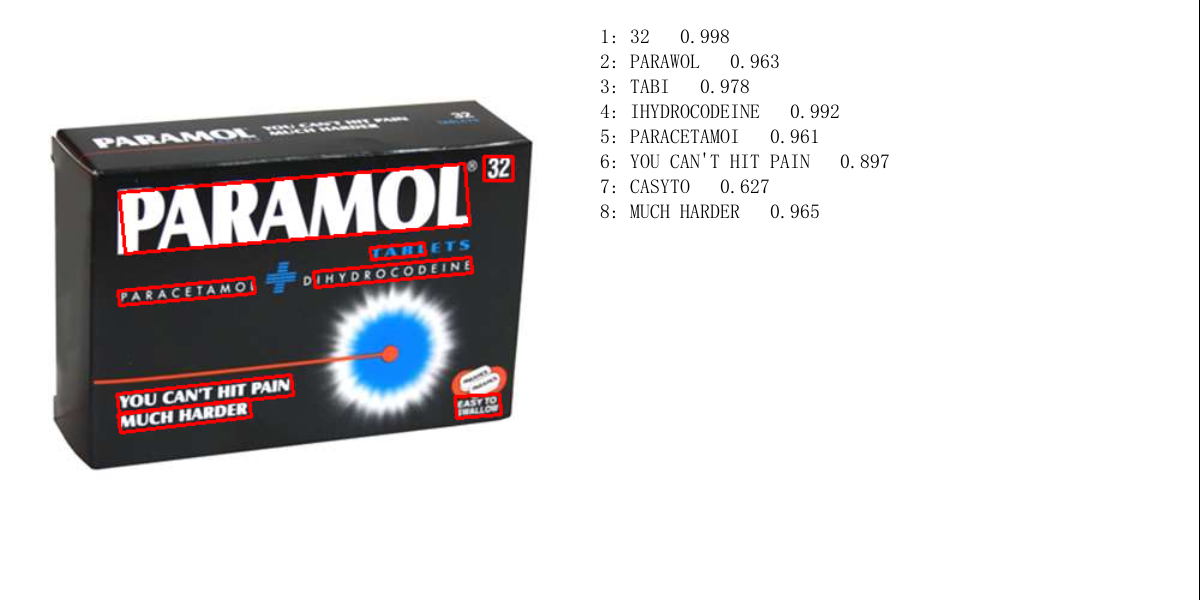

In [196]:
plot_ocr(ocr, './dataset/Test_final/image_10588.jpg')

> Dapat dillihat pada gambar dibawah, bahwa kata "Caladine" (yang salah diprediksi oleh model menjadi Calasine) terpisah dengan kata "Lotion", sehingga ini dapat menyebabkan edit distance "Caladine" ke "Caladine Lotion" menjadi lebih jauh. Sedangkan pada kata "Calamine", terdapat kata "Calamine" juga sehingga edit distance menjadi lebih dekat. Untuk mengatasi masalah ini, kata "Calamine" dapat dihapus dari text yang terdeteksi, sehingga kata yang terdekat adalah yang benar.

[2023/10/08 15:07:49] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.27956175804138184
[2023/10/08 15:07:50] ppocr DEBUG: cls num  : 4, elapsed : 0.03099656105041504
[2023/10/08 15:07:50] ppocr DEBUG: rec_res num  : 4, elapsed : 0.04200577735900879


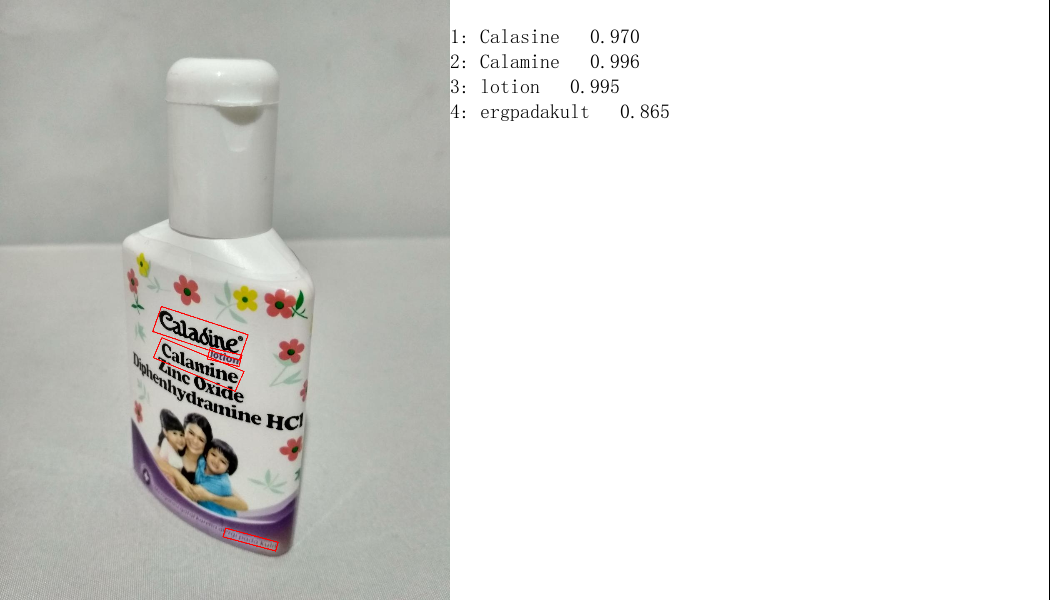

In [199]:
plot_ocr(ocr, './dataset/Test_final/image_9704.jpg')

Pada obat Fungiderm, terdapat tulisan Clotrimazole. Yang menjadi permasalahan adalah Clotrimazole merupakan sebuah obat yang ada pada wordlist kita sehingga spelling correction bisa melenceng.

[2023/10/08 15:39:52] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.20569348335266113
[2023/10/08 15:39:52] ppocr DEBUG: cls num  : 6, elapsed : 0.03499794006347656
[2023/10/08 15:39:52] ppocr DEBUG: rec_res num  : 6, elapsed : 0.10652399063110352


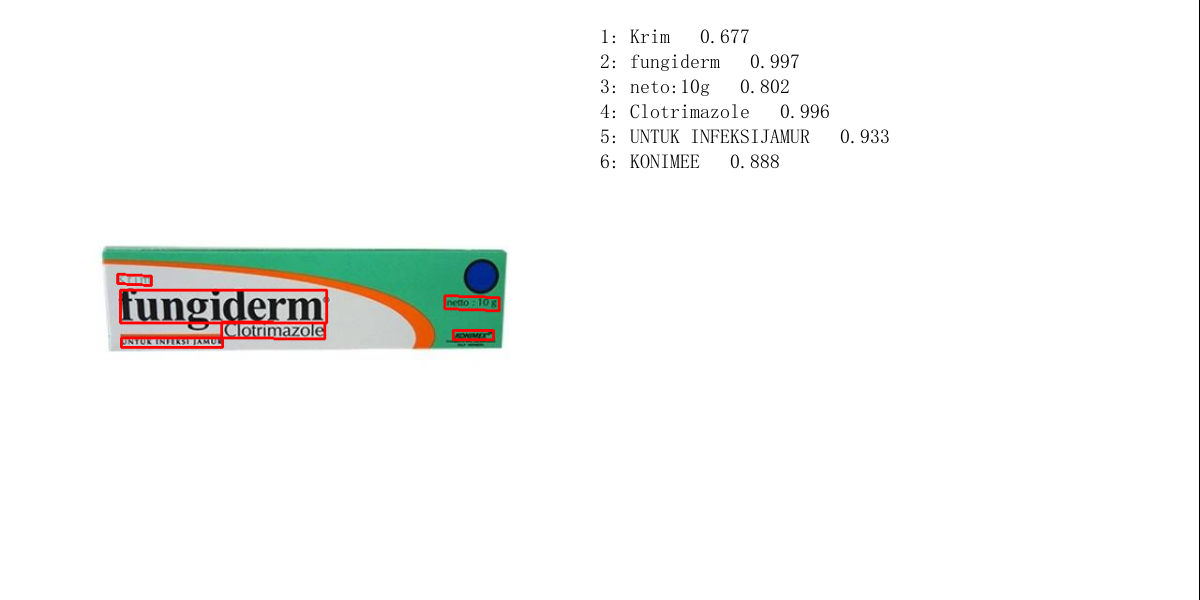

In [227]:
plot_ocr(ocr, './dataset/Test_final/image_10209.jpg')

> Terlihat pada dataset testing bahwa data testing terkadang berisi image yang kurang relevan dengan text (dalam kasus ini OCR), sehingga akan menjadi sebuah task yang impossible untuk dilakukan. Dari situ tim kami menemukan bahwa dataset testing memiliki data yang memiliki label sama yang berurutan setiap 10 data, sehingga kami dapat melakukan post evaluation dengan cara memperoleh modus dari setiap 10 data tersebut dan menggantikan data tersebut dengan modus tersebut. 

[2023/10/08 12:38:39] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.22155141830444336
[2023/10/08 12:38:39] ppocr DEBUG: cls num  : 4, elapsed : 0.028998374938964844
[2023/10/08 12:38:39] ppocr DEBUG: rec_res num  : 4, elapsed : 0.04601120948791504


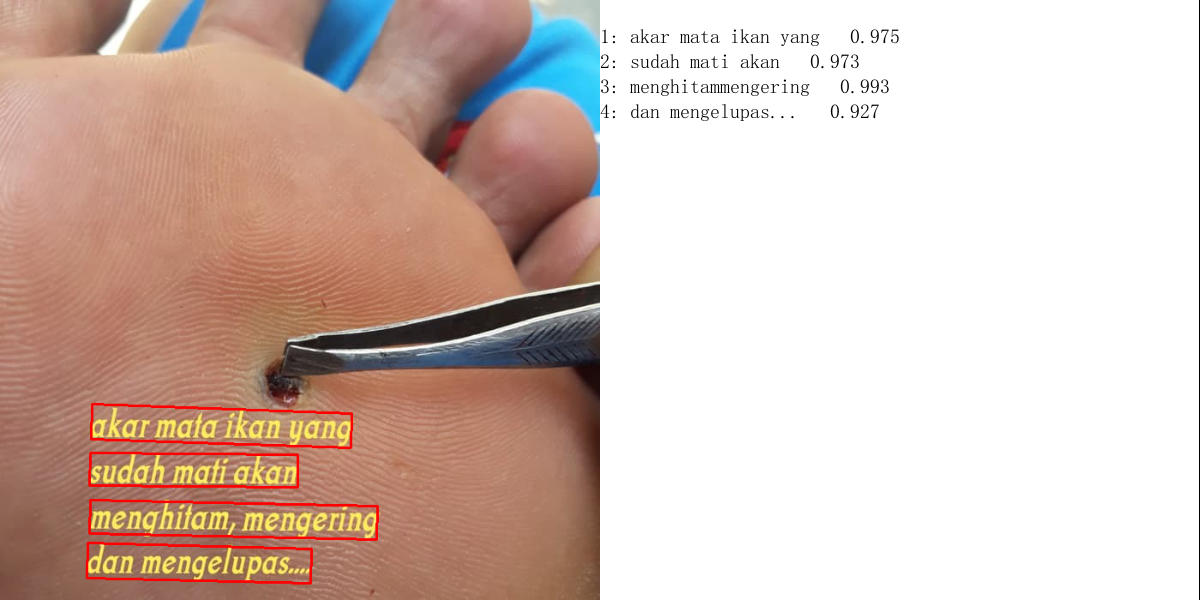

In [74]:
plot_ocr(ocr, './dataset/Test_final/image_9733.jpg')

> Contohnya seperti pada gambar di atas, dimana image tersebut tidak memiliki text yang relevan dengan labelnya. Namun kita sebagai manusia paham bahwa gambar ini tetap nyambung dengann label disekitarnya yaitu "Callusol" yang merupakan obat untuk penyakit diatas.

In [194]:
for i in range(0, len(test_pred_df), 10):
    modus = test_pred_df.iloc[i:i + 10]['predicted'].mode()
    test_pred_df.loc[i:i + 10, "post_eval_predicted"] = modus[0]

test_pred_df.head()

,Image Name,Folder Name,predicted,post_eval_predicted
0,image_9417.jpg,Nama Obat,Abacavir,Abacavir
1,image_9418.jpg,Nama Obat,Neurobion,Abacavir
2,image_9419.jpg,Nama Obat,Abacavir,Abacavir
3,image_9420.png,Nama Obat,Abacavir,Abacavir
4,image_9421.jpg,Nama Obat,Abacavir,Abacavir


## Submission

In [188]:
submission_df = pd.read_csv("dataset/test.csv")
submission_df.head()

,Image Name,Folder Name
0,image_9417.jpg,Nama Obat
1,image_9418.jpg,Nama Obat
2,image_9419.jpg,Nama Obat
3,image_9420.png,Nama Obat
4,image_9421.jpg,Nama Obat


In [189]:
submission_df["Folder Name"] = test_pred_df["post_eval_predicted"]
submission_df.to_csv("submissions/submission2.csv", index=False)
submission_df.head()

,Image Name,Folder Name
0,image_9417.jpg,Abacavir
1,image_9418.jpg,Abacavir
2,image_9419.jpg,Abacavir
3,image_9420.png,Abacavir
4,image_9421.jpg,Abacavir
